In [2]:

import pickle
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')

CHUNK_SIZE = 50000
STOPWORDS = nltk.corpus.stopwords.words('english')
VECTORIZER_PICKLE = 'vectorizer.pkl'

labeled_data = '../labeled.csv'

data_types = {
    'text': str,
    'industry': str,
}


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/snirlugassy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import random

p = 0.1

print(f'Reading CSV file {labeled_data}')
data = pd.read_csv(
    labeled_data, 
    usecols=['text', 'industry'],
    dtype=data_types,
    engine='c',
    # skiprows=lambda i: i>0 and random.random() > p
)

data.reset_index(drop=True, inplace=True)

print('Replacing NaN text')
data.text.replace(np.nan, "", inplace=True)
data.info(memory_usage='deep')

Reading CSV file ../labeled.csv
Replacing NaN text
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149543 entries, 0 to 149542
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      149543 non-null  object
 1   industry  149543 non-null  object
dtypes: object(2)
memory usage: 1.2 GB


In [5]:
industries = data.industry.unique()
num_of_industries = len(industries)
print(f'Processing data for {num_of_industries} industries')

Processing data for 147 industries


In [6]:

from sklearn.feature_extraction.text import TfidfVectorizer
corpus = data.text

vectorizer = TfidfVectorizer()

print('Training TF-IDF Vectorizer')
X = vectorizer.fit_transform(corpus)
print(X.shape)

print('Saving vectorizer to vectorizer.pkl')
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

Training TF-IDF Vectorizer
(149543, 2221511)
Saving vectorizer to vectorizer.pkl


In [7]:
means = []

for i in industries:
    X_ind = X[data[data['industry']==i].index]
    means.append(X_ind.mean(axis=0))

means = np.stack(means)

print("Shape:", means.shape)

means

Shape: (147, 2221511)


matrix([[0.00395956, 0.00208052, 0.0002596 , ..., 0.        , 0.        ,
         0.        ],
        [0.00377378, 0.00624116, 0.00022793, ..., 0.        , 0.        ,
         0.        ],
        [0.00451886, 0.04115469, 0.0003954 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.00730103, 0.00306777, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.01470276, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.03056139, 0.        , 0.00062039, ..., 0.        , 0.        ,
         0.        ]])

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
means2d = pca.fit_transform(means)

means2d


/home/snirlugassy/Documents/School/Data Collection Lab/project/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([[-0.07368057, -0.03553819],
       [-0.09201687, -0.00190944],
       [-0.0260695 , -0.00388377],
       [-0.07342591, -0.01001886],
       [-0.002846  , -0.02295098],
       [-0.09095376, -0.00743257],
       [-0.01427473,  0.06440704],
       [-0.01689179, -0.05091672],
       [ 0.00171541, -0.03225617],
       [-0.01807899, -0.02533536],
       [-0.03066962, -0.01520369],
       [-0.01423833,  0.02839687],
       [ 0.00486795, -0.04323672],
       [-0.01536653, -0.0080908 ],
       [ 0.01872521, -0.04712254],
       [ 0.02173206,  0.01763781],
       [-0.07893416, -0.01296639],
       [-0.00477578, -0.0378379 ],
       [ 0.06261907,  0.0120687 ],
       [-0.04394686, -0.01264836],
       [-0.00803235, -0.01657306],
       [-0.03297508,  0.02925046],
       [-0.06901819, -0.01213785],
       [-0.03438783, -0.03921703],
       [-0.02333588,  0.03095795],
       [-0.0076203 ,  0.06722979],
       [ 0.04867786, -0.02108296],
       [-0.00588033,  0.01086939],
       [ 0.03006678,

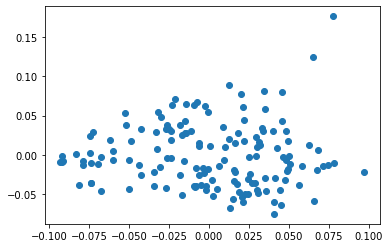

In [9]:
import matplotlib.pyplot as plt

plt.scatter(means2d[:,0], means2d[:,1])

In [10]:
from sklearn.cluster import KMeans, Birch, MiniBatchKMeans

clustering = KMeans(
    n_clusters=20,
)

y = clustering.fit_predict(means2d)
y

array([ 9,  3,  6,  3,  2,  3,  1, 16, 16,  6,  6, 11, 16,  2, 12, 13,  3,
       16, 17,  6,  2, 11,  3,  6, 11,  1, 18, 19, 10, 10, 19,  9, 15, 18,
       17, 16, 16, 17,  1, 11,  6, 19, 19, 12, 15, 11, 16,  8,  8,  5, 13,
       15, 11, 10,  2, 16,  2,  4, 12, 10,  6,  0, 15,  3, 16,  1,  0, 18,
       12,  4, 11, 17,  5,  3,  3,  8, 19,  1,  2,  3, 15,  1,  3, 12, 13,
       11, 18,  2, 10,  4,  4,  4, 10,  8, 13,  6, 16,  4, 17, 11,  5,  9,
        2, 17,  8,  1,  1, 12,  8,  2,  3, 17, 10, 15, 15, 11,  0, 10, 19,
       19, 11,  2,  9, 16,  9, 13, 14, 10, 19,  1,  3, 11, 13,  0,  6,  3,
       10, 13, 13,  5,  1, 12, 17, 18,  8,  7,  5], dtype=int32)

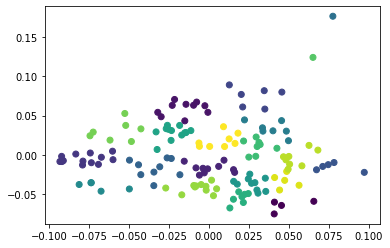

In [11]:
plt.scatter(means2d[:,0], means2d[:,1], c=y)

In [ ]:
print('Calculating cluster majority per industry')
cluster_ind = data[['cluster', 'industry']].groupby(['industry']).agg(lambda x:x.value_counts().index[0])
cluster_ind = cluster_ind.cluster.to_dict()
print(cluster_ind)

_cluster_dist = np.zeros(20)
for i,c in cluster_ind.items():
    _cluster_dist[c] += 1
_cluster_dist /= sum(_cluster_dist)
print('cluster size in %: \n' , _cluster_dist*100)